In [5]:
import numpy as np
import Loader
import Transformer
import matplotlib.pyplot as plt
import matplotlib.pyplot
plt.rcParams["font.family"] = "serif"
plt.style.use('dark_background')

## Load and Preprare Data

In [2]:
#note loading data also shuffles order of the data
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

## Correlation between docking, fusion, and activity scores.

In [3]:
dockingScores = abs(compoundDataTrain[:,0:10]) #use positive for magnitude reasons
fusionScores = compoundDataTrain[:,10:20]
print(labelsTrain[0], labelsTrain[10]) #make sure we got the right order

docking_score_0 fusion_score_0


## Just docking

Averagae High Activity mean:  7.382927553444181
Average Low Activity mean:  6.904714424007744

Average High Activity max:  7.792042755344418
Average Low Activity max:  7.286447241045498


Text(0.5, 1.0, 'Max Docking Activity Compared')

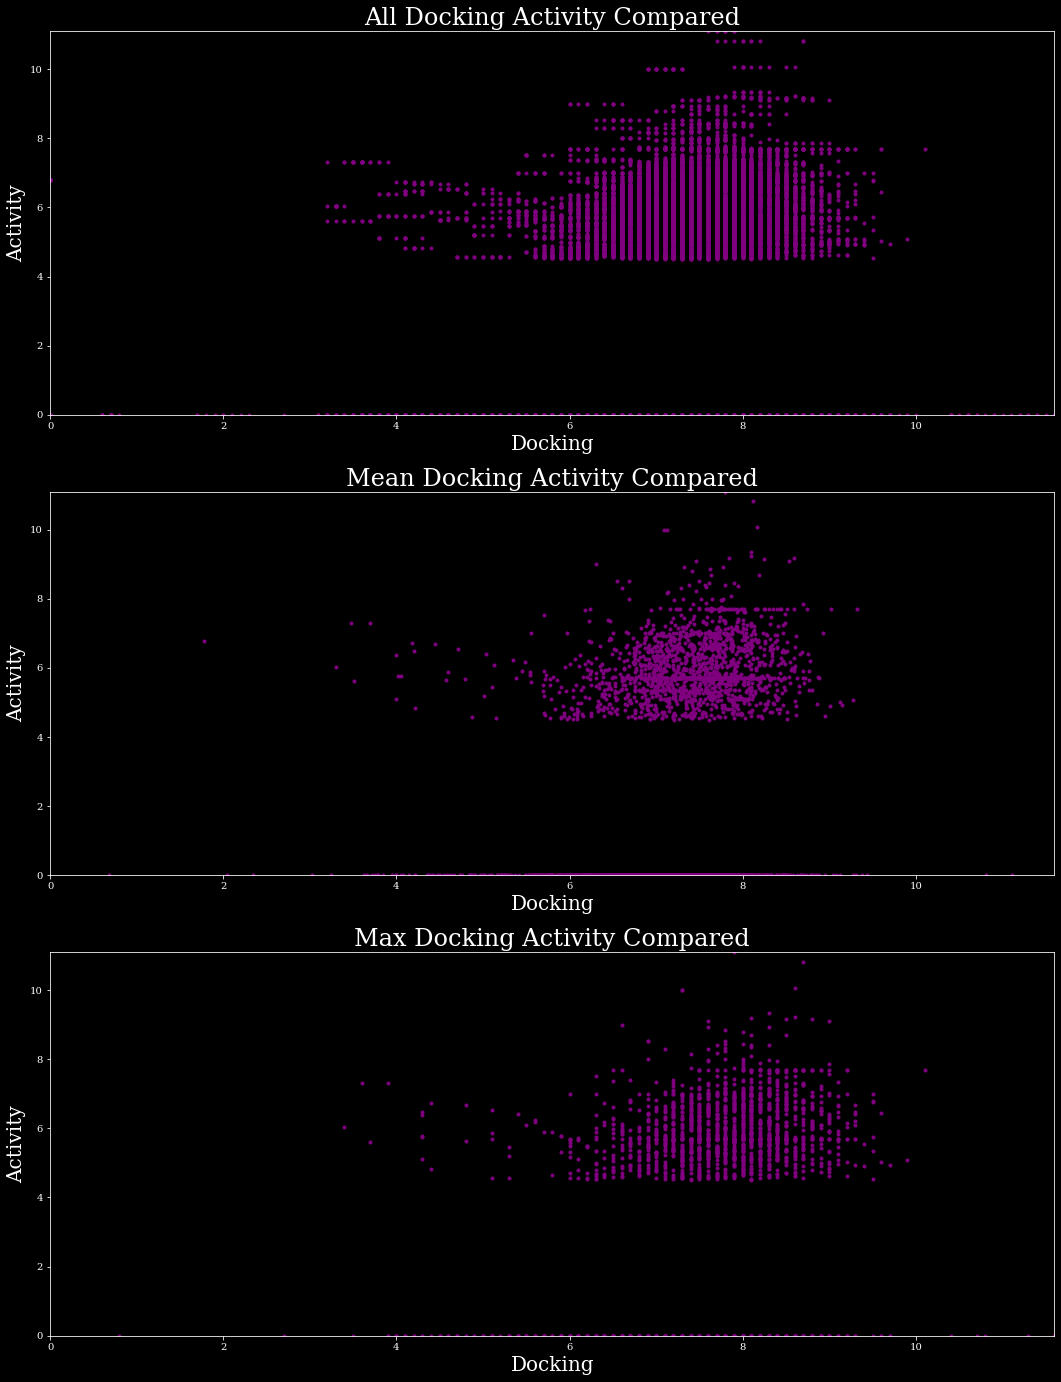

In [21]:
fig, ax = plt.subplots(3,1, figsize=(18,8*3)) #all docking, each mean, each max magnitude

for i in range(10): #all docking scores
    ax[0].plot(dockingScores[:,i], activitiesTrain, ".", color="purple")

dockingMean = np.mean(dockingScores, axis=1)
dockingMax = np.max(dockingScores, axis=1)
    
ax[1].plot(dockingMean, activitiesTrain, ".", color="purple")
ax[2].plot(dockingMax, activitiesTrain, ".", color="purple")

print("Averagae High Activity mean: ", np.mean(dockingMean[activitiesTrain > 4]))
print("Average Low Activity mean: ", np.mean(dockingMean[activitiesTrain < 4]))

print("\nAverage High Activity max: ", np.mean(dockingMax[activitiesTrain > 4]))
print("Average Low Activity max: ", np.mean(dockingMax[activitiesTrain < 4]))

for i in range(3): #set min and max for x and y
    ax[i].set_xlim([np.min(dockingScores), np.max(dockingScores)])
    ax[i].set_ylim([np.min(activitiesTrain), np.max(activitiesTrain)])

    ax[i].set_xlabel("Docking", fontsize=20)
    ax[i].set_ylabel("Activity", fontsize=20)
    
ax[0].set_title("All Docking Activity Compared", fontsize=24)
ax[1].set_title("Mean Docking Activity Compared", fontsize=24)
ax[2].set_title("Max Docking Activity Compared", fontsize=24)

## Just fusion

Averagae High Activity mean:  5.042387212695607
Average Low Activity mean:  4.933990875583931

Average High Activity max:  5.223353857381829
Average Low Activity max:  5.129974312146176


Text(0.5, 1.0, 'Max Fusion Activity Compared')

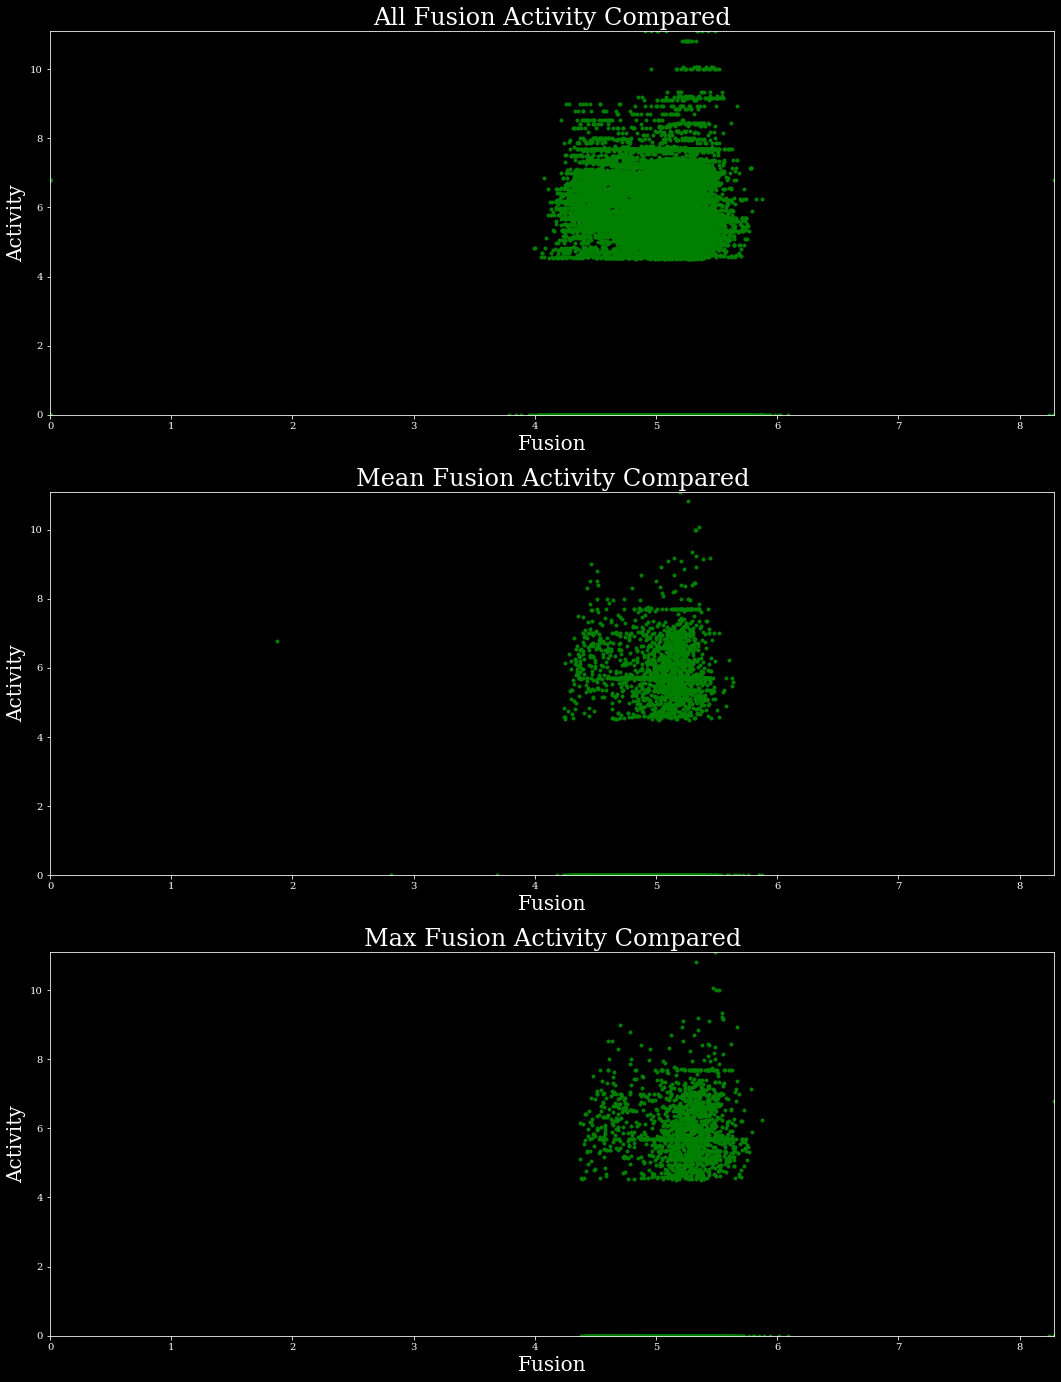

In [17]:
fig, ax = plt.subplots(3,1, figsize=(18,8*3)) #all fusion, each mean, each max magnitude

for i in range(10): #all fusion scores
    ax[0].plot(fusionScores[:,i], activitiesTrain, ".", color="green")

fusionMean = np.mean(fusionScores, axis=1)
fusionMax = np.max(fusionScores, axis=1)    

ax[1].plot(fusionMean, activitiesTrain, ".", color="green")
ax[2].plot(fusionMax, activitiesTrain, ".", color="green")

print("Averagae High Activity mean: ", np.mean(fusionMean[activitiesTrain > 4]))
print("Average Low Activity mean: ", np.mean(fusionMean[activitiesTrain < 4]))

print("\nAverage High Activity max: ", np.mean(fusionMax[activitiesTrain > 4]))
print("Average Low Activity max: ", np.mean(fusionMax[activitiesTrain < 4]))

for i in range(3): #set min and max for x and y
    ax[i].set_xlim([np.min(fusionScores), np.max(fusionScores)])
    ax[i].set_ylim([np.min(activitiesTrain), np.max(activitiesTrain)])
    
    ax[i].set_xlabel("Fusion", fontsize=20)
    ax[i].set_ylabel("Activity", fontsize=20)
    
ax[0].set_title("All Fusion Activity Compared", fontsize=24)
ax[1].set_title("Mean Fusion Activity Compared", fontsize=24)
ax[2].set_title("Max Fusion Activity Compared", fontsize=24)

## Docking and Fusion
Fusion on X, Docking on Y

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(18,8*3)) #all fusion, each mean, each max magnitude

fusionHigh = fusionScores[activitiesTrain > 4] 
fusionLow = fusionScores[activitiesTrain < 4]
dockingHigh = dockingScores[activitiesTrain > 4]
dockingLow = dockingScores[activitiesTrain < 4]

segments = 25
segSizeH = int(np.ceil(len(dockingHigh)/segments))
segSizeL = int(np.ceil(len(dockingLow)/segments))
for i in range(10): #all fusion scores
    for j in range(segments): #alternate between plotting some red and some blue so one color doesn't dominate
        sMinL = segSizeL*j
        sMaxL = segSizeL*(j+1)
        
        sMinH = segSizeH*j
        sMaxH = segSizeH*(j+1)
        
        ax[0].plot(fusionLow[sMinL:sMaxL,i], dockingLow[sMinL:sMaxL,i], ".", color="red", ms=2)
        ax[0].plot(fusionHigh[sMinH:sMaxH,i], dockingHigh[sMinH:sMaxH,i], ".", color="blue", ms=2)

lowMeanFusion = np.mean(fusionLow, axis=1)
highMeanFusion = np.mean(fusionHigh, axis=1)

lowMeanDocking = np.mean(dockingLow, axis=1)
highMeanDocking = np.mean(dockingHigh, axis=1)

lowMaxFusion = np.max(fusionLow, axis=1)
highMaxFusion = np.max(fusionHigh, axis=1)

lowMaxDocking = np.max(dockingLow, axis=1)
highMaxDocking = np.max(dockingHigh, axis=1)

    
ax[1].plot(lowMeanFusion, lowMeanDocking, ".", color="red", ms=4)
ax[1].plot(highMeanFusion, highMeanDocking, ".", color="blue", ms=4)

ax[2].plot(lowMaxFusion, lowMaxDocking, ".", color="red", ms=4)
ax[2].plot(highMaxFusion, highMaxDocking, ".", color="blue", ms=4)

print("Average High Activity mean: ", np.mean(highMeanFusion), np.mean(highMeanDocking))
print("Averagae Low Activity mean: ", np.mean(lowMeanFusion), np.mean(lowMeanDocking))

print("\nAverage High Activity max: ", np.mean(highMaxFusion), np.mean(highMaxDocking))
print("Average Low Activity max: ", np.mean(lowMaxFusion), np.mean(lowMaxDocking))


for i in range(3): #set min and max for x and y
    ax[i].set_xlim([3,7]) #ax[i].set_xlim([np.min(fusionScores), np.max(fusionScores)])
    ax[i].set_ylim([2,11]) #ax[i].set_ylim([np.min(dockingScores), np.max(dockingScores)])
    
    ax[i].set_xlabel("Fusion", fontsize=20)
    ax[i].set_ylabel("Docking", fontsize=20)
    
ax[0].set_title("All F/D Activity Compared", fontsize=24)
ax[1].set_title("Mean F/D Activity Compared", fontsize=24)
ax[2].set_title("Masx F/D Activity Compared", fontsize=24)

Average High Activity mean:  5.042387212695607 7.382927553444181
Averagae Low Activity mean:  4.933990875583931 6.904714424007744

Average High Activity max:  5.223353857381829 7.792042755344418
Average Low Activity max:  5.129974312146176 7.286447241045498


Text(0.5, 1.0, 'Masx F/D Activity Compared')

## SBP Model 
##### (Smooth Brained Predictor)
We know the mean for a high activity mean fusion score and the mean for a low activity mean fusion score. Use the mean of the two as the predictor.

Do the same but using the max, and also with docking as well.

Literally just use the high and low means for mean and max for fusion and docking and check performance.

In [9]:
activityBinary = activitiesTrain > 4

In [10]:
#Fusion Mean testing
lowFusionMean = np.mean(lowMeanFusion)
highFusionMean = np.mean(highMeanFusion)

midFusionMean = (lowFusionMean + highFusionMean)/2

print("low:", lowFusionMean, "high:", highFusionMean, "mid:", midFusionMean)

predictMeanF = fusionMean >= midFusionMean #if higher than mean we say high activity

correctMeanF = predictMeanF == activityBinary
print(len(correctMeanF[correctMeanF==True])/len(correctMeanF))

low: 4.933990875583931 high: 5.042387212695607 mid: 4.988189044139769
0.6157526683842474


In [11]:
#Fusion Max testing
lowFusionMax = np.mean(lowMaxFusion)
highFusionMax = np.mean(highMaxFusion)

midFusionMax = (lowFusionMax + highFusionMax)/2

print("low:",lowFusionMax, "high:", highFusionMax, "mid:", midFusionMax)

predictMaxF = fusionMax >= midFusionMax #if higher than mean we say high activity

correctMaxF = predictMaxF == activityBinary
print(len(correctMaxF[correctMaxF==True])/len(correctMaxF))

low: 5.129974312146176 high: 5.223353857381829 mid: 5.176664084764003
0.6260581523739418


In [12]:
#Docking Mean testing
lowDockingMean = np.mean(lowMeanDocking)
highDockingMean = np.mean(highMeanDocking)

midDockingMean = (lowDockingMean + highDockingMean)/2

print("low:", lowDockingMean, "high:", highDockingMean, "mid:", midDockingMean)

predictMeanD = dockingMean >= midDockingMean #if higher than mean we say high activity

correctMeanD = predictMeanD == activityBinary
print(len(correctMeanD[correctMeanD==True])/len(correctMeanD))

low: 6.904714424007744 high: 7.382927553444181 mid: 7.143820988725962
0.638571954361428


In [13]:
#Docking Max testing
lowDockingMax = np.mean(lowMaxDocking)
highDockingMax = np.mean(highMaxDocking)

midDockingMax = (lowDockingMax + highDockingMax)/2

print("low:",lowDockingMax, "high:", highDockingMax, "mid:", midDockingMax)

predictMaxD = dockingMax >= midDockingMax #if higher than mean we say high activity

correctMaxD = predictMaxD == activityBinary
print(len(correctMaxD[correctMaxD==True])/len(correctMaxD))

low: 7.286447241045498 high: 7.792042755344418 mid: 7.539244998194958
0.6297386823702613


### Combining these terrible predictors together

In [14]:
allPredictScores = predictMeanF.astype(int) + predictMaxF.astype(int) + predictMeanD.astype(int) + predictMaxD.astype(int)

#if 2 or more of these labels true, then good enough
finalPredict = allPredictScores >= 2

correctFinal = finalPredict == activityBinary
print(len(correctFinal[correctFinal==True])/len(correctFinal))
# WOOOOH 66%, still absolutely terrible

0.6606551343393449


### Try the combined simple predictor on the validation set

In [15]:
dockingScoresV = abs(compoundDataValidate[:,0:10]) #use positive for magnitude reasons
fusionScoresV = compoundDataValidate[:,10:20]

fusionMeanV = np.mean(fusionScoresV, axis=1)
fusionMaxV = np.max(fusionScoresV, axis=1)

dockingMeanV = np.mean(dockingScoresV, axis=1)
dockingMaxV = np.max(dockingScoresV, axis=1)

predict1 = fusionMeanV >= midFusionMean
predict2 = fusionMaxV >= midFusionMax
predict3 = dockingMeanV >= midDockingMean
predict4 = dockingMaxV >= midDockingMax

#put together predictions
allPredictScores = predict1.astype(int) + predict2.astype(int) + predict3.astype(int) + predict4.astype(int)

#if 2 or more of these labels true, then good enough
finalPredict = allPredictScores >= 2

correctFinal = finalPredict == (activitiesValidate > 4)
print(len(correctFinal[correctFinal==True])/len(correctFinal))
# WOOOOH 67%, hahahahhahahahahha still better than everything else lol

0.6735294117647059
